##TỔNG QUAN VỀ THUẬT TOÁN LOUVAIN
Thuật toán Louvain là một phương pháp phổ biến trong phân tích mạng xã hội và phân tích mạng, nhằm phát hiện và tối ưu hóa các cộng đồng trong mạng phức tạp. Nó được phát triển bởi Blondel và các cộng sự vào năm 2008. Mục tiêu chính của thuật toán Louvain là tìm ra các cụm hoặc cộng đồng trong mạng sao cho các nút trong cùng một cộng đồng có kết nối chặt chẽ với nhau hơn so với các nút ở cộng đồng khác. Điều này được thực hiện thông qua việc tối ưu hóa hàm modularity, một thước đo đánh giá chất lượng của việc phân chia các nút trong mạng.

##CÁCH THỨC HOẠT ĐỘNG
Thuật toán Louvain hoạt động theo một quá trình lặp lại gồm hai bước chính. Đầu tiên, mỗi nút trong mạng bắt đầu như một cộng đồng riêng lẻ. Sau đó, thuật toán liên tục di chuyển các nút từ cộng đồng này sang cộng đồng khác để tăng giá trị modularity, tức là tối ưu hóa sự phân cụm. Khi không còn cải thiện nào về modularity, các cộng đồng hiện tại sẽ được xem như các nút đơn lẻ trong một mạng mới. Quá trình này tiếp tục lặp lại trên mạng mới cho đến khi không thể cải thiện modularity hơn nữa. Qua mỗi vòng lặp, các cộng đồng lớn hơn và chặt chẽ hơn được hình thành, giúp phát hiện cấu trúc mạng một cách hiệu quả và chính xác.

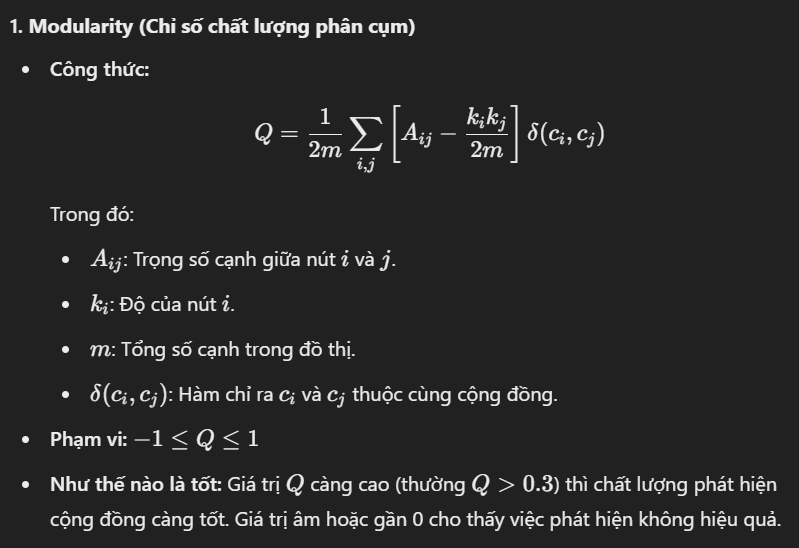
--------------------------------------------------------------------------------
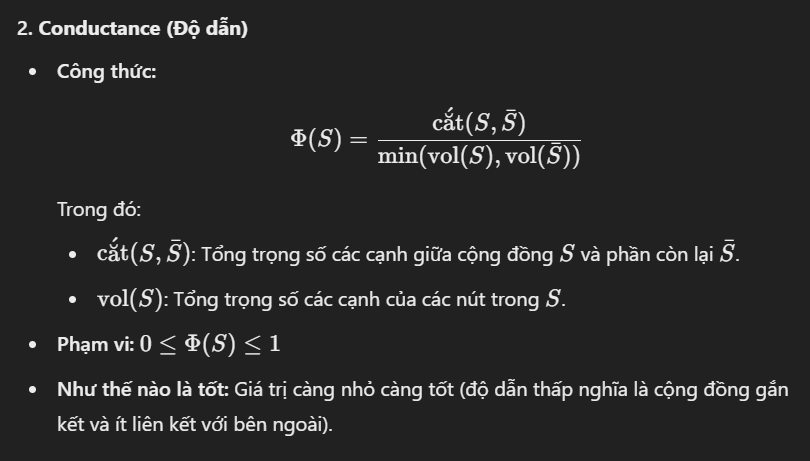
--------------------------------------------------------------------------------
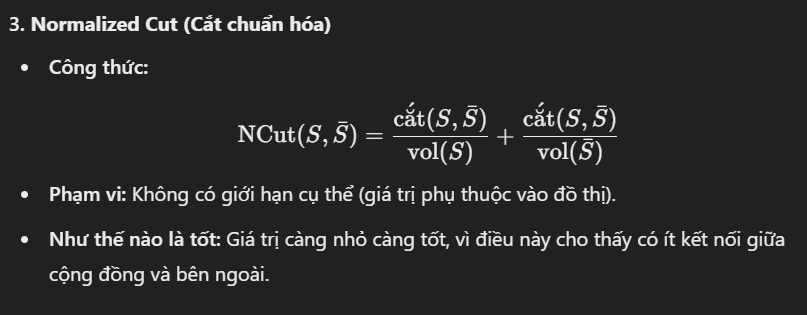
--------------------------------------------------------------------------------
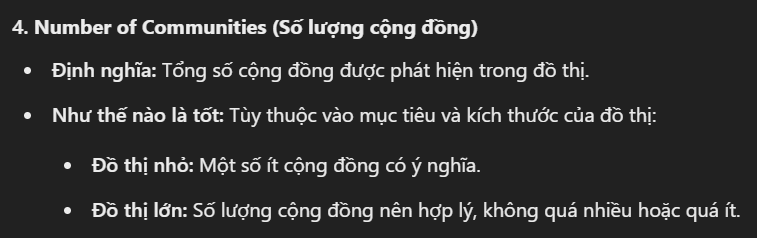
--------------------------------------------------------------------------------
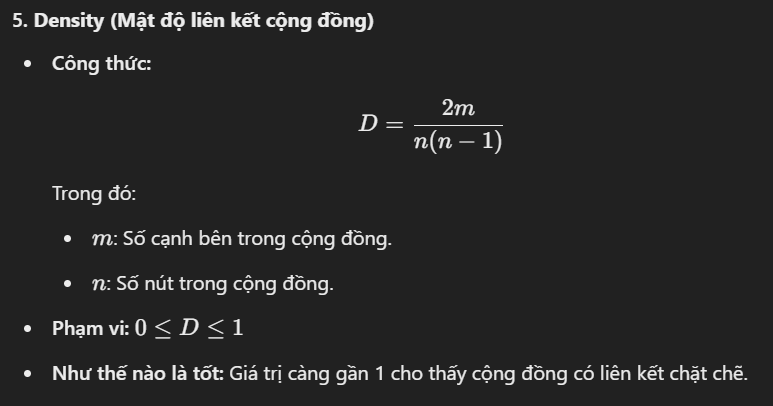
--------------------------------------------------------------------------------
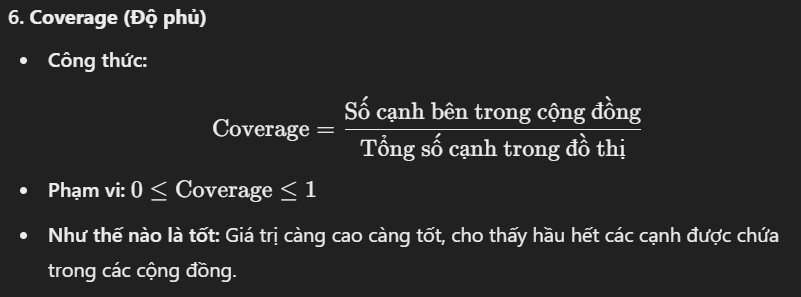
--------------------------------------------------------------------------------
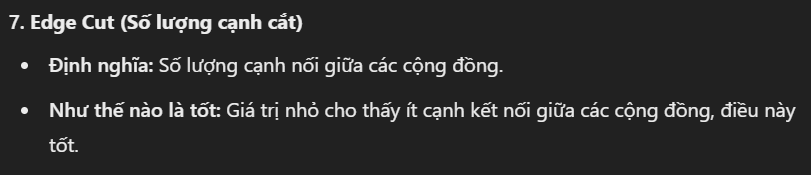

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import numpy as np

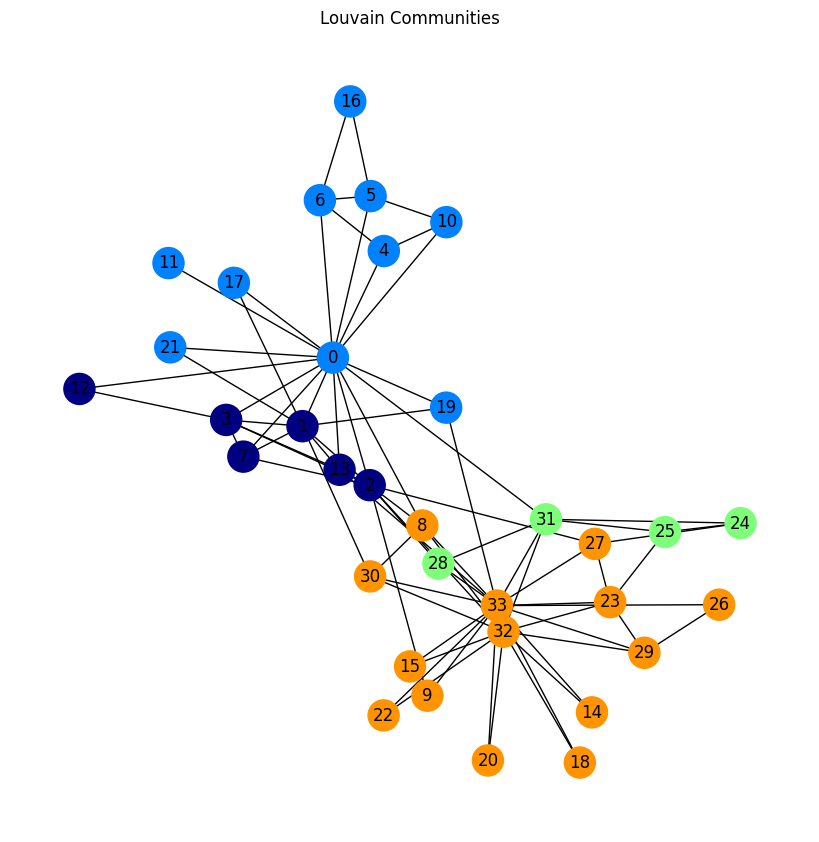

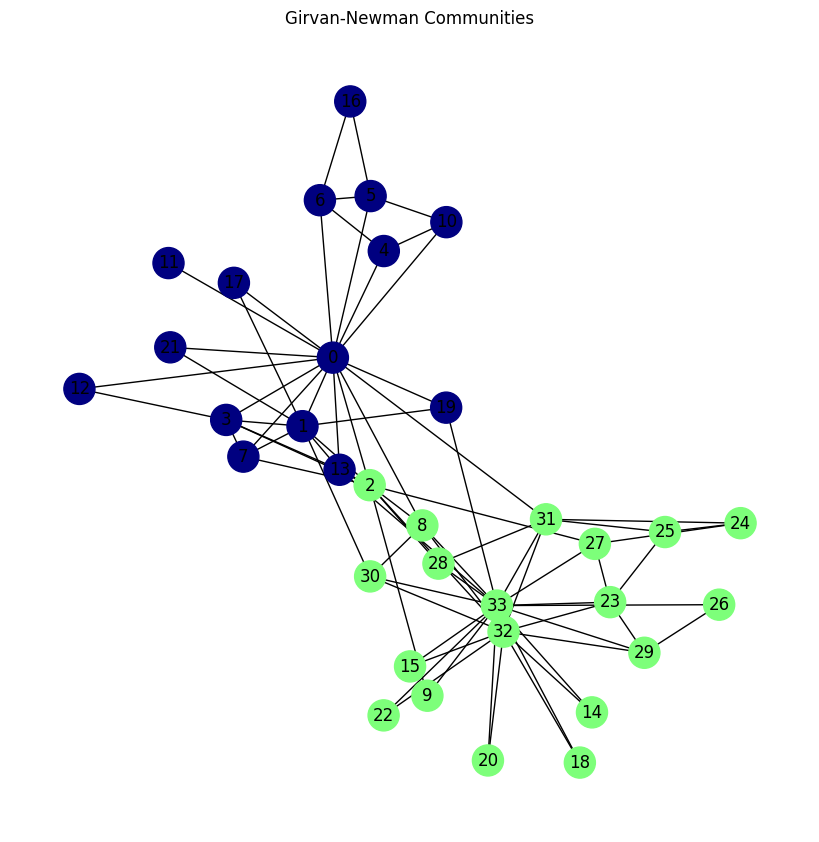

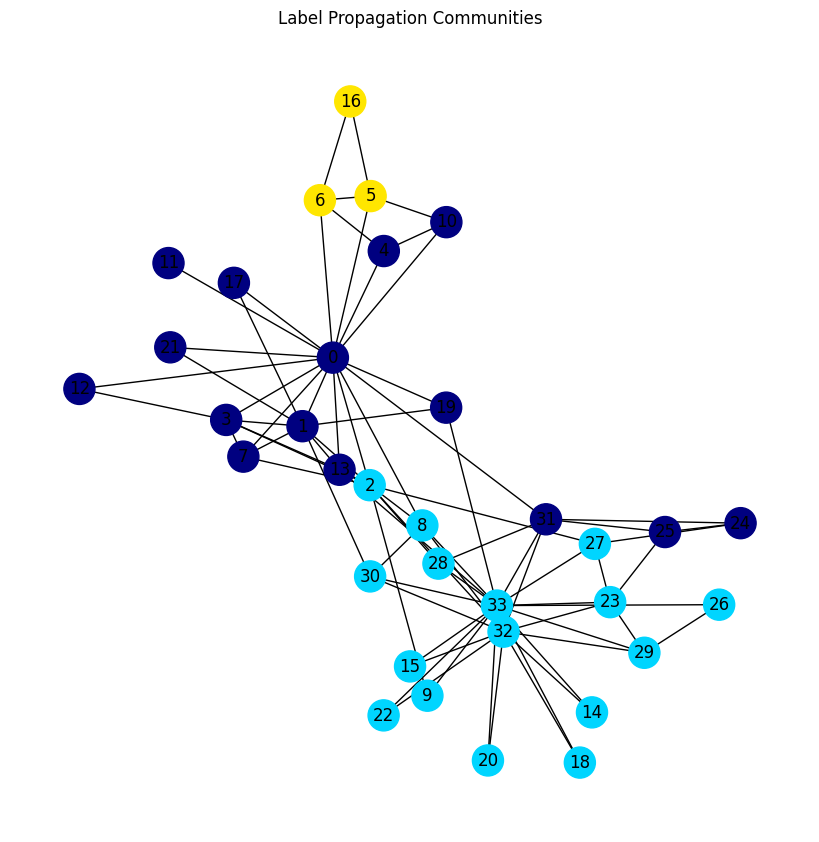

           Algorithm  Num Communities  Modularity  Conductance  Normalized Cut
0            Louvain                4    0.426622     0.352778        0.460099
1      Girvan-Newman                2    0.347660     0.151515        0.262626
2  Label Propagation                3    0.309486     0.281398        0.418541


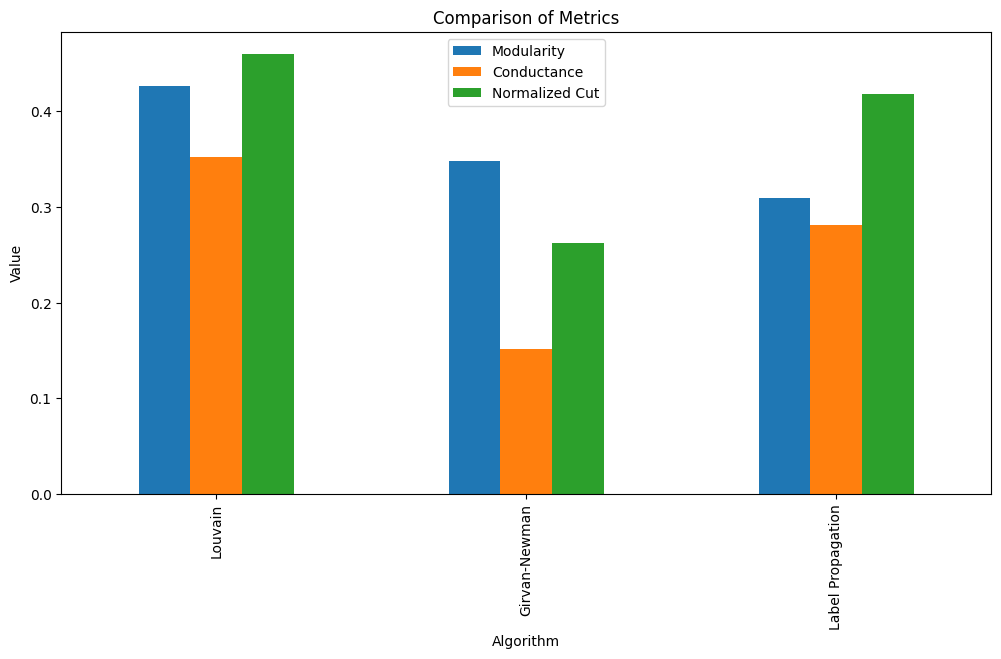

In [1]:
# 1. Load the graph
G = nx.karate_club_graph()

# 2. Apply community detection algorithms
# Louvain
louvain_partition = list(community.louvain_communities(G))

# Girvan-Newman
gn_generator = community.girvan_newman(G)
gn_partition = next(gn_generator)  # Take the first partition

# Label Propagation
lp_partition = list(community.label_propagation_communities(G))

# 3. Calculate metrics for each method
def calculate_metrics(G, partition):
    from networkx.algorithms import cuts
    metrics = {
        'num_communities': len(partition),
        'modularity': community.modularity(G, partition),
        'conductance': np.mean([cuts.conductance(G, c) for c in partition]),
        'normalized_cut': np.mean([cuts.normalized_cut_size(G, c) for c in partition])
    }
    return metrics

# Collect metrics
metrics_data = []
algorithms = ["Louvain", "Girvan-Newman", "Label Propagation"]
partitions = [louvain_partition, gn_partition, lp_partition]

for partition, algorithm in zip(partitions, algorithms):
    metrics = calculate_metrics(G, partition)
    metrics_data.append({
        'Algorithm': algorithm,
        'Num Communities': metrics['num_communities'],
        'Modularity': metrics['modularity'],
        'Conductance': metrics['conductance'],
        'Normalized Cut': metrics['normalized_cut']
    })

# 4. Visualize the communities
def visualize_communities(G, partition, title):
    pos = nx.spring_layout(G, seed=42)
    colors = [plt.cm.jet(i / len(partition)) for i in range(len(partition))]

    node_colors = []
    for node in G:
        for idx, comm in enumerate(partition):
            if node in comm:
                node_colors.append(colors[idx])
                break

    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=500)
    plt.title(title)
    plt.show()

# Visualize results
for partition, algorithm in zip(partitions, algorithms):
    visualize_communities(G, partition, f"{algorithm} Communities")

# 5. Display metrics
import pandas as pd

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

# 6. Compare metrics
metrics_df.plot(x="Algorithm", y=["Modularity", "Conductance", "Normalized Cut"],
                kind="bar", figsize=(12, 6), title="Comparison of Metrics")
plt.ylabel("Value")
plt.show()
